In [1]:
#STEPS of preprocessing of data
# step:1]- Import necessary library
# step:2]- Read Dataset
# step: 3]- sanity check of data
# step:4]- Exploratory Data Analysis (EDA)
# step:5] -Missing Value treatments
# step:6]- Outliers treatments
# step:7]- duplicates & garbage value treatments
# step: 8]- Normalization
# step:9]- Encoding of data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [3]:
d1 = pd.read_csv('all_season_details.csv',low_memory=False, dtype={25: str})
df = d1.copy()
df

comment_id  season  match_id match_name home_team away_team  \
0              110  2023.0   1359475   GT v CSK        GT       CSK   
1              120  2023.0   1359475   GT v CSK        GT       CSK   
2              130  2023.0   1359475   GT v CSK        GT       CSK   
3              140  2023.0   1359475   GT v CSK        GT       CSK   
4              150  2023.0   1359475   GT v CSK        GT       CSK   
...            ...     ...       ...        ...       ...       ...   
242545      219020  2008.0    336040   CSK v RR       CSK        RR   
242546      219030  2008.0    336040   CSK v RR       CSK        RR   
242547      219050  2008.0    336040   CSK v RR       CSK        RR   
242548      219040  2008.0    336040   CSK v RR       CSK        RR   
242549      219060  2008.0    336040   CSK v RR       CSK        RR   

       current_innings  innings_id  over  ball  ...  wicket_id  \
0                  CSK           1     1     1  ...        NaN   
1                  CSK           1     1     2  ...        NaN   
2                  CSK           1     1     3  ...        NaN   
3                  CSK           1     1     4  ...        NaN   
4                  CSK           1     1     5  ...        NaN   
...                ...         ...   ...   ...  ...        ...   
242545              RR           2    20     2  ...        NaN   
242546              RR           2    20     3  ...        NaN   
242547              RR           2    20     4  ...        NaN   
242548              RR           2    20     4  ...        NaN   
242549              RR           2    20     5  ...        NaN   

       wkt_batsman_name  wkt_bowler_name  wkt_batsman_runs  wkt_batsman_balls  \
0                   NaN              NaN               NaN                NaN   
1                   NaN              NaN               NaN                NaN   
2                   NaN              NaN               NaN                NaN   
3                   NaN              NaN               NaN                NaN   
4                   NaN              NaN               NaN                NaN   
...                 ...              ...               ...                ...   
242545              NaN              NaN               NaN                NaN   
242546              NaN              NaN               NaN                NaN   
242547              NaN              NaN               NaN                NaN   
242548              NaN              NaN               NaN                NaN   
242549              NaN              NaN               NaN                NaN   

        wkt_text isRetiredHurt  \
0            NaN         False   
1            NaN         False   
2            NaN         False   
3            NaN         False   
4            NaN         False   
...          ...           ...   
242545       NaN         False   
242546       NaN         False   
242547       NaN         False   
242548       NaN         False   
242549       NaN         False   

                                                     text  \
0       nice and full, angling and perhaps swinging in...   
1       Conway shuffles across off, and shimmies out a...   
2       good length, angling in at off and then straig...   
3       shorter and slanting into middle and leg, Gaik...   
4       Shami hits a heavy length and brings this back...   
...                                                   ...   
242545  lovely! Balaji's bowled a yorker outside off s...   
242546  Warne steps down the track and throws his bat ...   
242547  Warne reaches out for a full ball and squeezes...   
242548  what has he done! Balaji has bowled a wide out...   
242549  Balaji bowls a full toss angling into the left...   

                                                  preText  \
0       <p><strong>7.30pm</strong> Gaikwad and Conway ...   
1                                                     NaN   
2                                                     NaN   
3  

In [4]:
df.columns

Index(['comment_id', 'season', 'match_id', 'match_name', 'home_team',
       'away_team', 'current_innings', 'innings_id', 'over', 'ball', 'runs',
       'shortText', 'isBoundary', 'isWide', 'isNoball', 'batsman1_id',
       'batsman1_name', 'batsman1_runs', 'batsman1_balls', 'bowler1_id',
       'bowler1_name', 'bowler1_overs', 'bowler1_maidens', 'bowler1_runs',
       'bowler1_wkts', 'batsman2_id', 'batsman2_name', 'batsman2_runs',
       'batsman2_balls', 'bowler2_id', 'bowler2_name', 'bowler2_overs',
       'bowler2_maidens', 'bowler2_runs', 'bowler2_wkts', 'wicket_id',
       'wkt_batsman_name', 'wkt_bowler_name', 'wkt_batsman_runs',
       'wkt_batsman_balls', 'wkt_text', 'isRetiredHurt', 'text', 'preText',
       'postText'],
      dtype='object')

In [5]:
#shape
df.shape

(242550, 45)

In [6]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242550 entries, 0 to 242549
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   comment_id         242550 non-null  int64  
 1   season             242067 non-null  float64
 2   match_id           242550 non-null  int64  
 3   match_name         242550 non-null  object 
 4   home_team          242550 non-null  object 
 5   away_team          242550 non-null  object 
 6   current_innings    242550 non-null  object 
 7   innings_id         242550 non-null  int64  
 8   over               242550 non-null  int64  
 9   ball               242550 non-null  int64  
 10  runs               242550 non-null  int64  
 11  shortText          242550 non-null  object 
 12  isBoundary         242550 non-null  bool   
 13  isWide             242550 non-null  bool   
 14  isNoball           242550 non-null  bool   
 15  batsman1_id        242550 non-null  int64  
 16  ba

In [7]:
#finding any missing value
df.isnull().sum()
# df.isnull().sum()/df.shape[0]*100  => Percentage

comment_id                0
season                  483
match_id                  0
match_name                0
home_team                 0
away_team                 0
current_innings           0
innings_id                0
over                      0
ball                      0
runs                      0
shortText                 0
isBoundary                0
isWide                    0
isNoball                  0
batsman1_id               0
batsman1_name             0
batsman1_runs             0
batsman1_balls            0
bowler1_id                0
bowler1_name              0
bowler1_overs             0
bowler1_maidens           0
bowler1_runs              0
bowler1_wkts              0
batsman2_id               0
batsman2_name             2
batsman2_runs             0
batsman2_balls            0
bowler2_id            12841
bowler2_name          12841
bowler2_overs         12841
bowler2_maidens       12841
bowler2_runs          12841
bowler2_wkts          12841
wicket_id           

In [8]:
# choose the method of imputing missing value 
# like mean, median, mode or KNNInputer

from sklearn.impute import KNNImputer
impute=KNNImputer()
########
for i in ["season"]:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [9]:
# for i in df.select_dtypes(include="number").columns:
#     df[i]=impute.fit_transform(df[[i]])

In [10]:
null_columns = df.isnull().sum()
indexes_with_nulls = null_columns[null_columns != 0].index.tolist()
indexes_with_nulls

['batsman2_name',
 'bowler2_id',
 'bowler2_name',
 'bowler2_overs',
 'bowler2_maidens',
 'bowler2_runs',
 'bowler2_wkts',
 'wicket_id',
 'wkt_batsman_name',
 'wkt_bowler_name',
 'wkt_batsman_runs',
 'wkt_batsman_balls',
 'wkt_text',
 'text',
 'preText',
 'postText']

In [11]:
df=df.drop(indexes_with_nulls,axis=1)

In [12]:
df.columns

Index(['comment_id', 'season', 'match_id', 'match_name', 'home_team',
       'away_team', 'current_innings', 'innings_id', 'over', 'ball', 'runs',
       'shortText', 'isBoundary', 'isWide', 'isNoball', 'batsman1_id',
       'batsman1_name', 'batsman1_runs', 'batsman1_balls', 'bowler1_id',
       'bowler1_name', 'bowler1_overs', 'bowler1_maidens', 'bowler1_runs',
       'bowler1_wkts', 'batsman2_id', 'batsman2_runs', 'batsman2_balls',
       'isRetiredHurt'],
      dtype='object')

In [13]:
df.duplicated().sum()

1

In [14]:
df=df.drop_duplicates()

In [15]:
df.duplicated().sum()

0

In [16]:
#descriptive stats
df.describe()

comment_id         season      match_id     innings_id  \
count  242549.000000  242549.000000  2.425490e+05  242549.000000   
mean    86415.887594    2015.582864  8.701749e+05       1.483247   
std     79516.331773       4.636305  3.530664e+05       0.499720   
min       110.000000    2008.000000  3.359820e+05       1.000000   
25%     18040.000000    2012.000000  5.483150e+05       1.000000   
50%     29010.000000    2015.000000  8.298190e+05       1.000000   
75%    118060.000000    2020.000000  1.216506e+06       2.000000   
max    219080.000000    2023.000000  1.370353e+06       2.000000   

                over           ball           runs   batsman1_id  \
count  242549.000000  242549.000000  242549.000000  2.425490e+05   
mean       10.161716       3.483886       1.317899  2.503055e+05   
std         5.658034       1.707447       1.612824  2.968812e+05   
min         1.000000       1.000000       0.000000  4.292000e+03   
25%         5.000000       2.000000       0.000000  3.296600e+04   
50%        10.000000       3.000000       1.000000  5.291200e+04   
75%        15.000000       5.000000       1.000000  3.791430e+05   
max        20.000000       7.000000       7.000000  1.349361e+06   

       batsman1_runs  batsman1_balls    bowler1_id  bowler1_overs  \
count  242549.000000   242549.000000  2.425490e+05  242549.000000   
mean       18.047698       14.119873  3.158598e+05       1.682535   
std        18.341554       11.905876  3.217494e+05       1.115569   
min         0.000000        0.000000  4.508000e+03       0.000000   
25%         4.000000        5.000000  3.401900e+04       0.500000   
50%        12.000000       11.000000  2.691700e+05       1.500000   
75%        27.000000       20.000000  4.752810e+05       2.500000   
max       174.000000       73.000000  1.350792e+06       4.000000   

       bowler1_maidens   bowler1_runs   bowler1_wkts  batsman2_runs  \
count    242549.000000  242549.000000  242549.000000  242549.000000   
mean          0.017411      13.656152       0.468264      16.551686   
std           0.131614      10.238288       0.728663      17.771904   
min           0.000000       0.000000       0.000000       0.000000   
25%           0.000000       5.000000       0.000000       3.000000   
50%           0.000000      12.000000       0.000000      11.000000   
75%           0.000000      20.000000       1.000000      25.000000   
max           2.000000      70.000000       6.000000     174.000000   

       batsman2_balls  
count   242549.000000  
mean        13.219288  
std         11.892062  
min          0.000000  
25%          4.000000  
50%         10.000000  
75%         20.000000  
max         73.000000

In [17]:
df.describe(include="object")

match_name home_team away_team current_innings               shortText  \
count      242549    242549    242549          242549                  242549   
unique        159        15        15              15                   88537   
top       DC v MI       CSK        MI              DC  Sharma to Kohli, 1 run   
freq         5965     29624     30851           37007                      94   

       batsman1_name         bowler1_name batsman2_id  
count         242549               242549      242549  
unique           637                  504         626  
top      Virat Kohli  Ravichandran Ashwin       28235  
freq            5726                 4325        5827

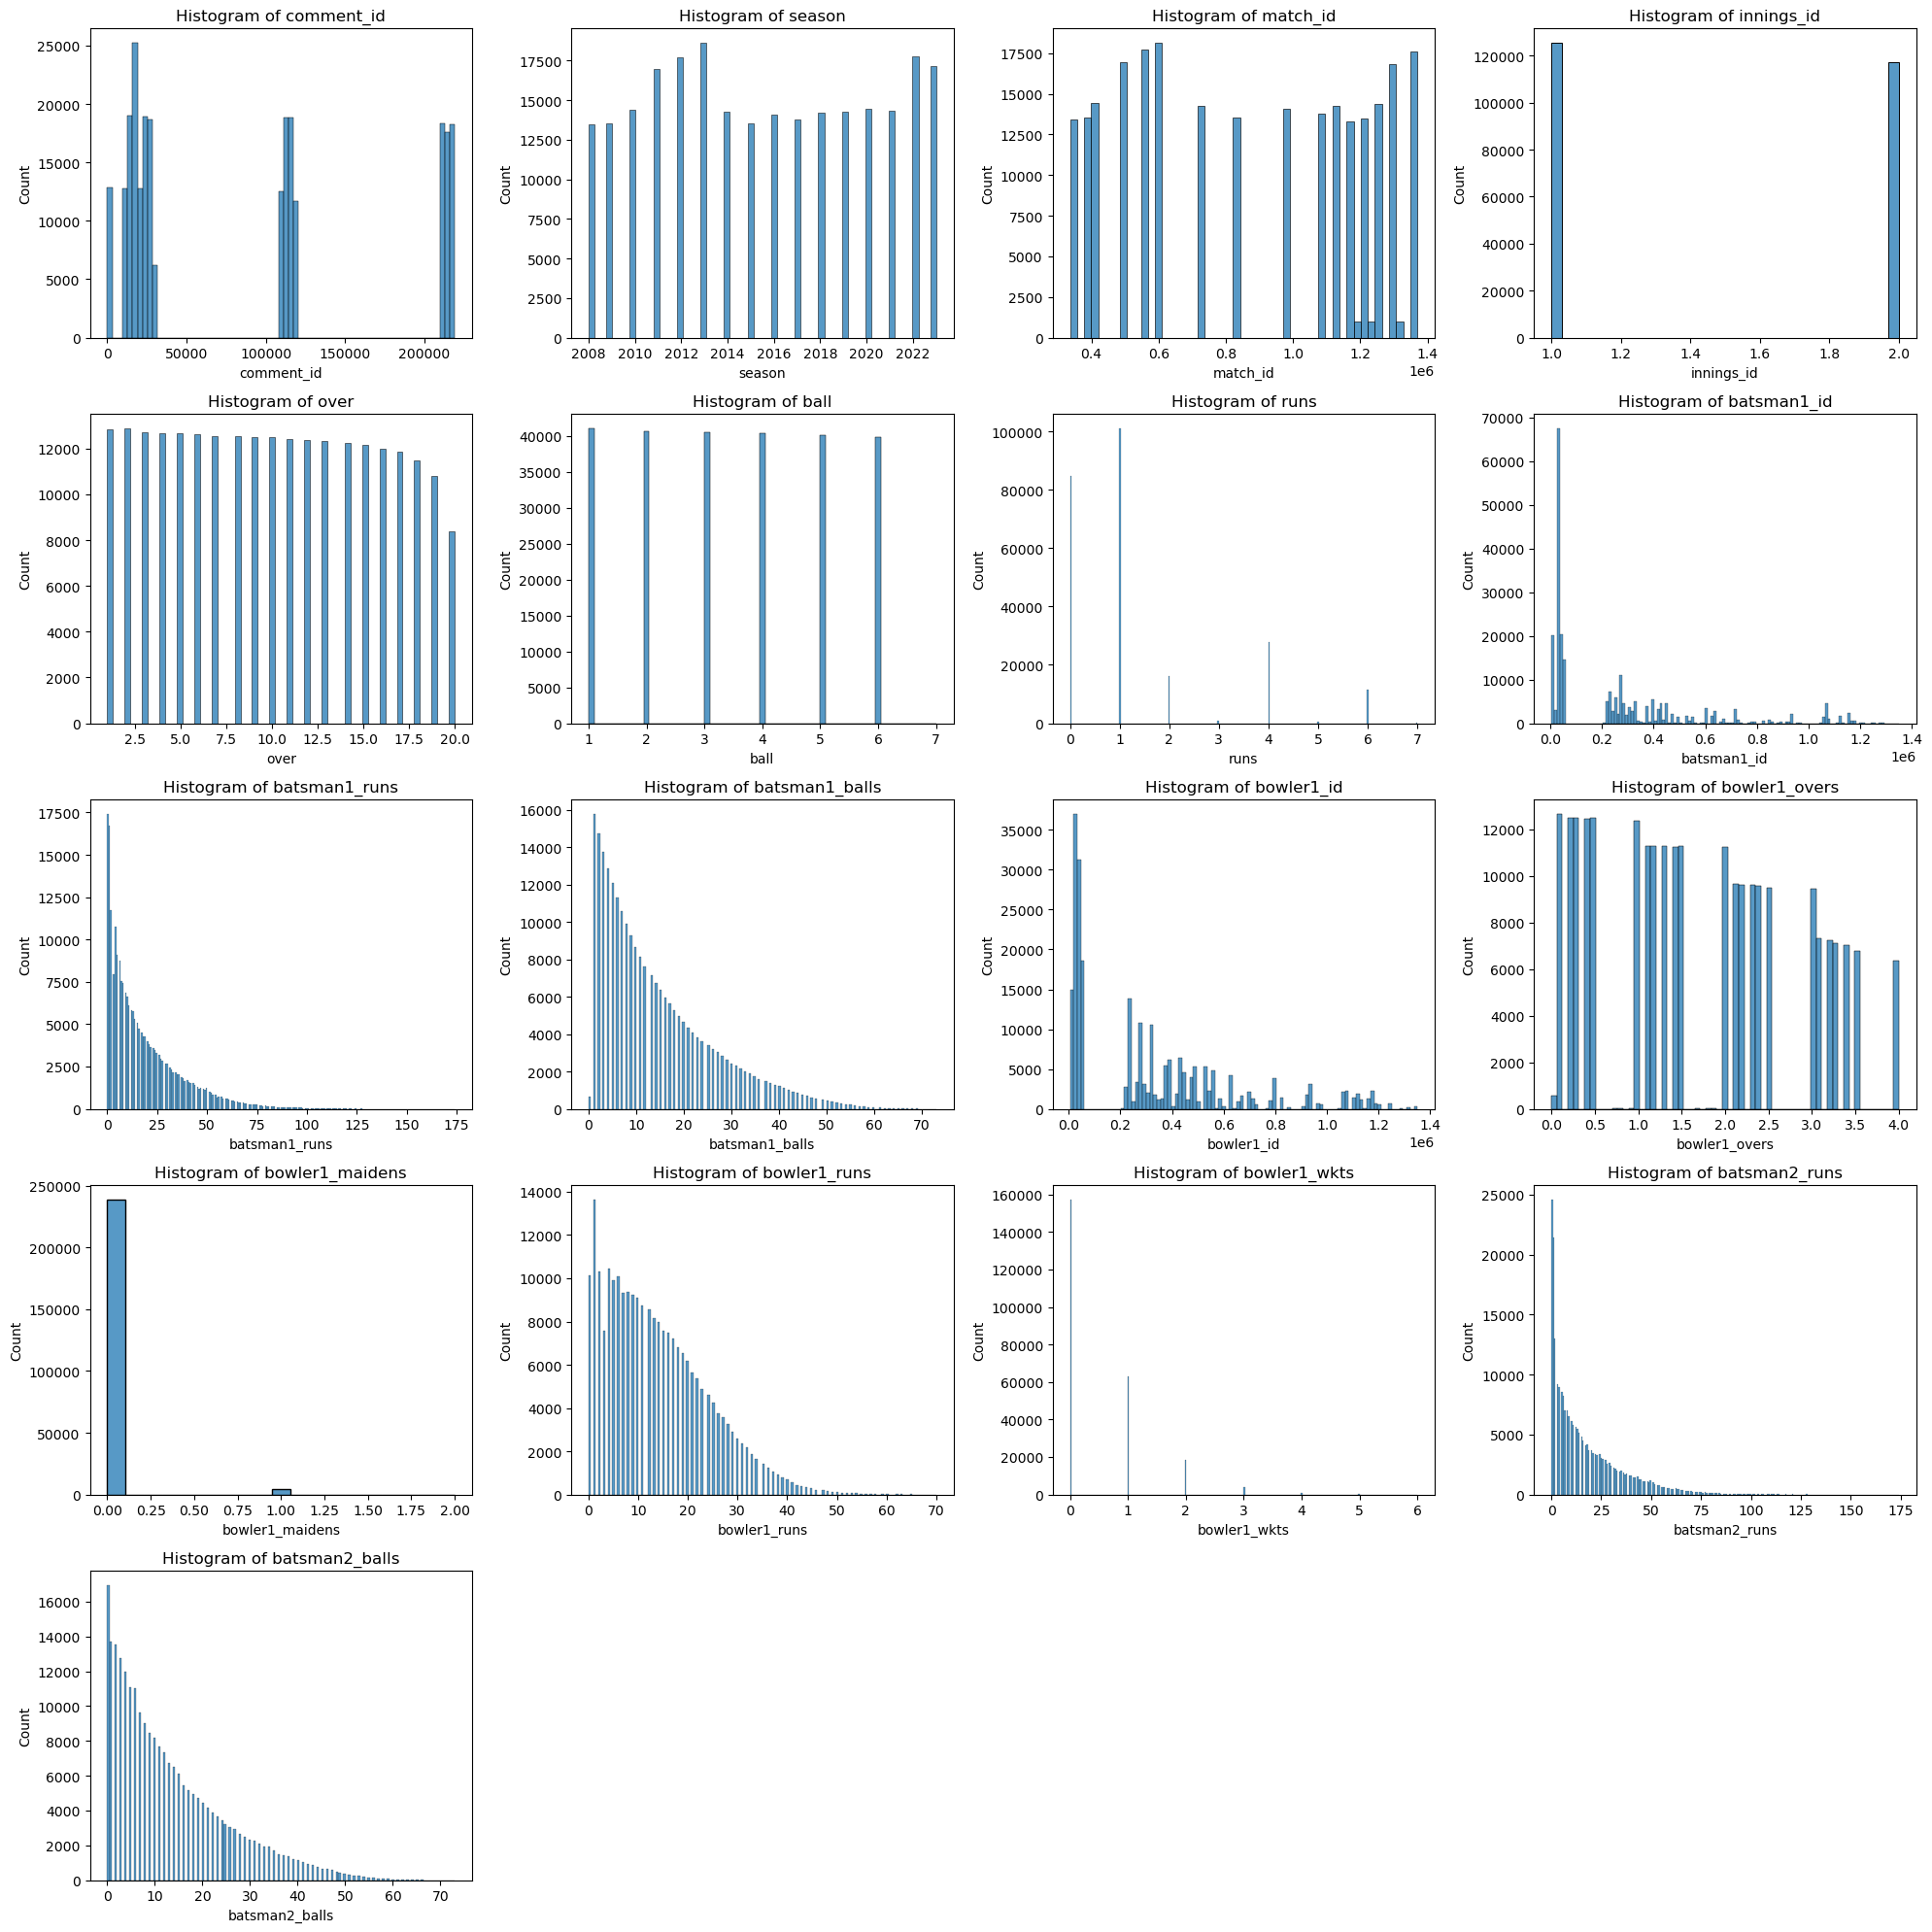

In [18]:
# Histogram
numeric_columns = df.select_dtypes(include="number").columns

num_cols = 4
num_rows = (len(numeric_columns) + num_cols - 1) // num_cols  

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))  
axes = axes.flatten()  

for i, col in enumerate(numeric_columns):
    sns.histplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f"Histogram of {col}")

for j in range(i + 1, num_rows * num_cols):
    axes[j].set_visible(False)

plt.tight_layout() 
plt.show()

In [19]:
#correlation with heatmap to intrepret the relation and multi collinearity
s=df.select_dtypes(include="number").corr()

<Axes: >

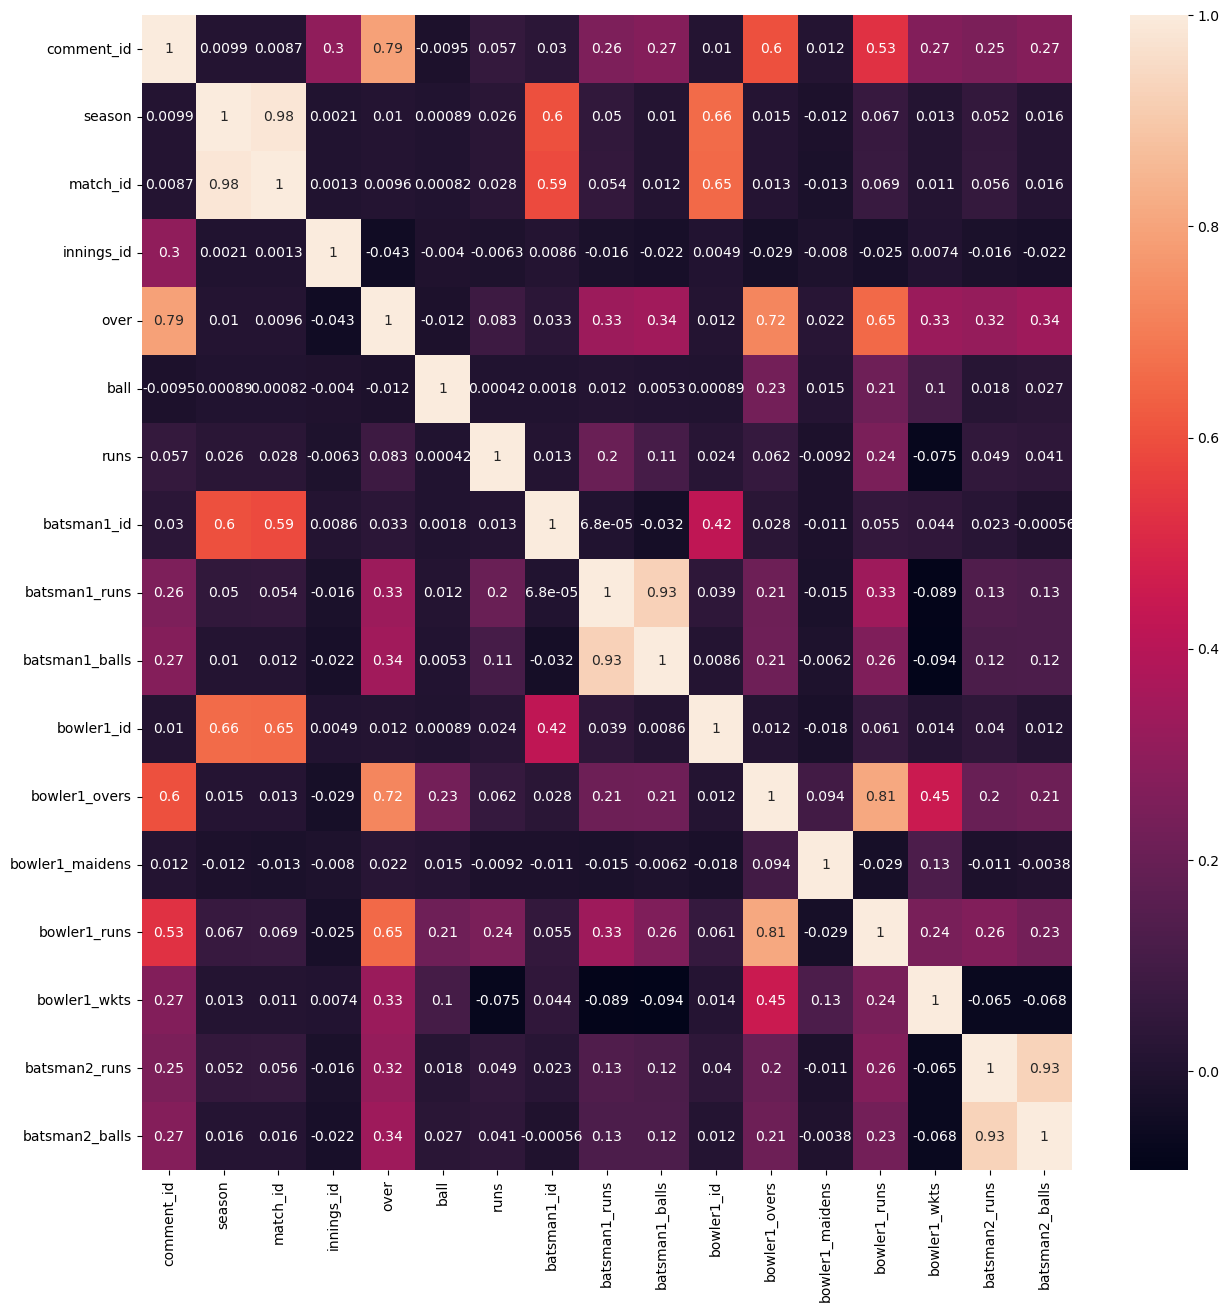

In [20]:
plt.figure(figsize=(15,15))
sns.heatmap(s,annot=True)

In [21]:
#label and onehot encoding  and get_dummies

In [22]:
dummy=pd.get_dummies(data=df,columns=["home_team","away_team","current_innings"],drop_first=True)

In [23]:
ohe = OneHotEncoder(handle_unknown="ignore",sparse_output=False).set_output(transform='pandas')

In [24]:
ohetransform=ohe.fit_transform(df[["home_team","away_team","current_innings"]])

In [25]:
ohetransform

home_team_CSK  home_team_DC  home_team_GL  home_team_GT  \
0                 0.0           0.0           0.0           1.0   
1                 0.0           0.0           0.0           1.0   
2                 0.0           0.0           0.0           1.0   
3                 0.0           0.0           0.0           1.0   
4                 0.0           0.0           0.0           1.0   
...               ...           ...           ...           ...   
242545            1.0           0.0           0.0           0.0   
242546            1.0           0.0           0.0           0.0   
242547            1.0           0.0           0.0           0.0   
242548            1.0           0.0           0.0           0.0   
242549            1.0           0.0           0.0           0.0   

        home_team_KKR  home_team_KXIP  home_team_Kochi  home_team_LSG  \
0                 0.0             0.0              0.0            0.0   
1                 0.0             0.0              0.0            0.0   
2                 0.0             0.0              0.0            0.0   
3                 0.0             0.0              0.0            0.0   
4                 0.0             0.0              0.0            0.0   
...               ...             ...              ...            ...   
242545            0.0             0.0              0.0            0.0   
242546            0.0             0.0              0.0            0.0   
242547            0.0             0.0              0.0            0.0   
242548            0.0             0.0              0.0            0.0   
242549            0.0             0.0              0.0            0.0   

        home_team_MI  home_team_PBKS  ...  current_innings_KXIP  \
0                0.0             0.0  ...                   0.0   
1                0.0             0.0  ...                   0.0   
2                0.0             0.0  ...                   0.0   
3                0.0             0.0  ...                   0.0   
4                0.0             0.0  ...                   0.0   
...              ...             ...  ...                   ...   
242545           0.0             0.0  ...                   0.0   
242546           0.0             0.0  ...                   0.0   
242547           0.0             0.0  ...                   0.0   
242548           0.0             0.0  ...                   0.0   
242549           0.0             0.0  ...                   0.0   

        current_innings_Kochi  current_innings_LSG  current_innings_MI  \
0                         0.0                  0.0                 0.0   
1                         0.0                  0.0                 0.0   
2                         0.0                  0.0                 0.0   
3                         0.0                  0.0                 0.0   
4                         0.0                  0.0                 0.0   
...                       ...                  ...                 ...   
242545                    0.0                  0.0                 0.0   
242546                    0.0                  0.0                 0.0   
242547                    0.0                  0.0                 0.0   
242548                    0.0                  0.0                 0.0   
242549                    0.0                  0.0                 0.0   

        current_innings_PBKS  current_innings_PWI  current_innings_RCB  \
0                        0.0                  0.0                  0.0   
1                        0.0                  0.0                  0.0   
2                        0.0                  0.0                  0.0   
3                        0.0                  0.0                  0.0   
4                        0.0                  0.0                  0.0   
...                      ...                  ...                  ...   
242545                   0.0                  0.0                  0.0   
242546                   0.0            

In [26]:
pp=pd.concat([df,ohetransform],axis=1).drop(columns=["home_team","away_team","current_innings"])

In [27]:
pp.head()
pp.to_csv('preprocessed(all_season_details).csv')

In [28]:
label=LabelEncoder()

In [29]:
lsd=df.copy()
lsd

comment_id  season  match_id match_name home_team away_team  \
0              110  2023.0   1359475   GT v CSK        GT       CSK   
1              120  2023.0   1359475   GT v CSK        GT       CSK   
2              130  2023.0   1359475   GT v CSK        GT       CSK   
3              140  2023.0   1359475   GT v CSK        GT       CSK   
4              150  2023.0   1359475   GT v CSK        GT       CSK   
...            ...     ...       ...        ...       ...       ...   
242545      219020  2008.0    336040   CSK v RR       CSK        RR   
242546      219030  2008.0    336040   CSK v RR       CSK        RR   
242547      219050  2008.0    336040   CSK v RR       CSK        RR   
242548      219040  2008.0    336040   CSK v RR       CSK        RR   
242549      219060  2008.0    336040   CSK v RR       CSK        RR   

       current_innings  innings_id  over  ball  ...  bowler1_id  \
0                  CSK           1     1     1  ...      481896   
1                  CSK           1     1     2  ...      481896   
2                  CSK           1     1     3  ...      481896   
3                  CSK           1     1     4  ...      481896   
4                  CSK           1     1     5  ...      481896   
...                ...         ...   ...   ...  ...         ...   
242545              RR           2    20     2  ...       26829   
242546              RR           2    20     3  ...       26829   
242547              RR           2    20     4  ...       26829   
242548              RR           2    20     4  ...       26829   
242549              RR           2    20     5  ...       26829   

               bowler1_name  bowler1_overs  bowler1_maidens  bowler1_runs  \
0            Mohammed Shami            0.1                0             0   
1            Mohammed Shami            0.2                0             0   
2            Mohammed Shami            0.3                0             0   
3            Mohammed Shami            0.4                0             1   
4            Mohammed Shami            0.5                0             1   
...                     ...            ...              ...           ...   
242545  Lakshmipathy Balaji            3.2                0            35   
242546  Lakshmipathy Balaji            3.3                0            36   
242547  Lakshmipathy Balaji            3.4                0            39   
242548  Lakshmipathy Balaji            3.3                0            38   
242549  Lakshmipathy Balaji            3.5                0            41   

        bowler1_wkts batsman2_id  batsman2_runs  batsman2_balls  isRetiredHurt  
0                  0     1060380              0               0          False  
1                  0     1060380              0               0          False  
2                  0      379140              0               2          False  
3                  0      379140              0               2          False  
4                  0     1060380              1               2          False  
...              ...         ...            ...             ...            ...  
242545             0       43265              6               5          False  
242546             0       43265              6               5          False  
242547             0       43265              6               5          False  
242548             0        8166              8               8          False  
242549             0        8166              9               9          False  

[242549 rows x 29 columns]

In [30]:
lsd["home_team"].unique()

array(['GT', 'PBKS', 'LSG', 'SRH', 'RCB', 'CSK', 'DC', 'RR', 'KKR', 'MI',
       'KXIP', 'RPS', 'GL', 'PWI', 'Kochi'], dtype=object)

In [31]:
lsd["home_team"]=label.fit_transform(lsd["home_team"])

In [32]:
lsd["home_team"].unique()

array([ 3,  9,  7, 14, 11,  0,  1, 13,  4,  8,  5, 12,  2, 10,  6])